Sample workflow: 
Select 4-band [NAIP](https://en.wikipedia.org/wiki/National_Agriculture_Imagery_Program) images from [Descarteslabs API](https://docs.descarteslabs.com/quickstart.html) and pass to [Microsoft AI for Earth API](https://aiforearth.portal.azure-api.net/docs/services/) for land cover classification.

## Scenes:

In [1]:
import numpy as np
import descarteslabs as dl

/home/jthoms/anaconda3/envs/descarteslabs/lib/python3.7/site-packages/geojson/mapping.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping


In [16]:
# Polygon at confluence of Chama and Chamita rivers (36.857837, -106.589106)
aoi_geometry = {
    'type': 'Polygon',
    'coordinates': ((
            (-106.60235881805419,36.85223919396893),
            (-106.57068729400633,36.85223919396893),
            (-106.57068729400633,36.87781836873228),
            (-106.60235881805419,36.87781836873228),
            (-106.60235881805419,36.85223919396893)
    ),)
}

# Descarteslabs scenes from National Agriculture Imagery Program v1, 2012-01-01 to 2018-01-01
scenes_v1, ctx_v1 = dl.scenes.search(aoi_geometry,
                               products=["usda:naip:rgbn:v1"],
                               start_datetime="2012-01-01",
                               end_datetime="2018-01-01",
                               limit=10)
# usda:naip:rgbn (deprecated), 2008-01-01 to 2016-01-01
scenes_v0, ctx_v0 = dl.scenes.search(aoi_geometry,
                               products=["usda:naip:rgbn"],
                               start_datetime="2008-01-01",
                               end_datetime="2016-01-01",
                               limit=10)
print(scenes_v1)
print(scenes_v0)

SceneCollection of 4 scenes
  * Dates: Jun 09, 2014 to Jun 15, 2016
  * Products: usda:naip:rgbn:v1: 4
SceneCollection of 4 scenes
  * Dates: Jun 09, 2011 to Jun 09, 2014
  * Products: usda:naip:rgbn: 4


In [21]:
# Select a scene from v1 dataset
scenes_v1 = scenes_v1.sorted("properties.date")
scene = scenes_v1[-1]
scene

Scene "usda:naip:rgbn:v1:meta_m_3610612_nw_13_1_20160615_v1"
  * Product: "usda:naip:rgbn:v1"
  * CRS: "EPSG:26913"
  * Date: Wed Jun 15 00:00:00 2016
  * Bands:
    * derived:bai: UInt16, [0, 65535] -> [-1.0, 1.0]
    * derived:evi: UInt16, [0, 65535] -> [-1.0, 1.0]
    * derived:ndvi: UInt16, [0, 65535] -> [-1.0, 1.0]
    * derived:rsqrt: Float64, [0, 1000] -> [0.0, 1.0]
    * derived:visual_cloud_mask: UInt16, [0, 1] -> None
    * blue: 1 meters, Byte, [0, 255] -> [0.0, 1.0]
    * green: 1 meters, Byte, [0, 255] -> [0.0, 1.0]
    * nir: 1 meters, Byte, [0, 255] -> [0.0, 1.0]
    * red: 1 meters, Byte, [0, 255] -> [0.0, 1.0]

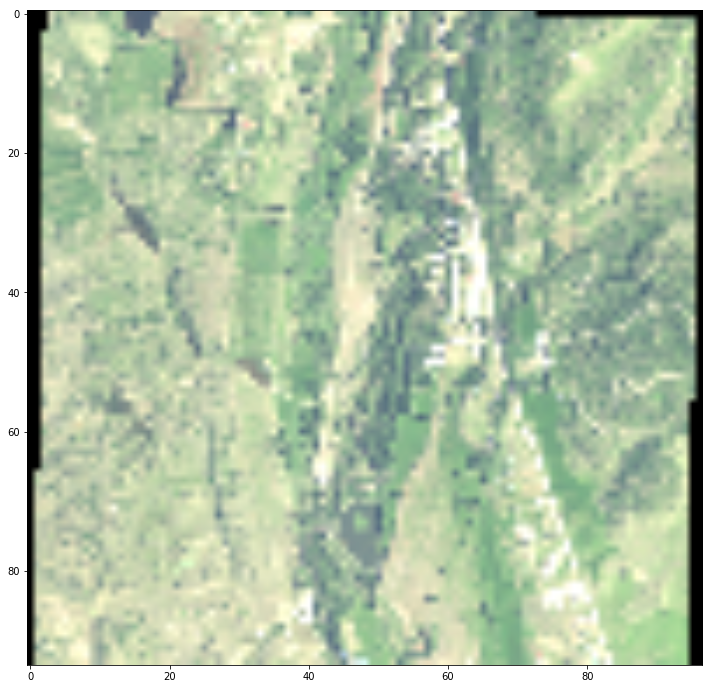

In [28]:
# Display
ctx_lowres = ctx_v1.assign(resolution=30)
arr = scene.ndarray("red green blue", ctx_lowres)
dl.scenes.display(arr)